In [37]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [2]:
dailyData = pd.read_csv("./input/train.csv")
dailyData.shape

(10886, 12)

In [3]:
dailyData.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [4]:
dailyData.datetime.head(2)

0    2011-01-01 00:00:00
1    2011-01-01 01:00:00
Name: datetime, dtype: object

In [5]:
dailyData.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [6]:
# 新增一列 date ，表示日期
dailyData["date"] = dailyData.datetime.map(lambda x : x.split()[0])
# 新增一列 hour ，表示小时
dailyData["hour"] = dailyData.datetime.map(lambda x : x.split()[1].split(":")[0])

In [7]:

# dailyData.date.head()

from datetime import datetime
# 变成日期类型以后，就可以交给 calendar 得到星期几了
datetime.strptime("2018-12-04", "%Y-%m-%d")

datetime.strptime("2018-12-04", "%Y-%m-%d").weekday()

1

In [8]:
datetime.strptime("2018-12-04", "%Y-%m-%d").month

12

In [9]:
import calendar

print(list(calendar.day_name))
for i in range(7):
    print(calendar.day_name[i])

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday


In [10]:
# 新增“星期”这一列 
dailyData["weekday"] = dailyData.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
dailyData["weekday"].head(2)

0    Saturday
1    Saturday
Name: weekday, dtype: object

In [11]:
list(calendar.month_name)

['',
 'January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [12]:
# 新增“月份”这一列
dailyData["month"] = dailyData.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
dailyData["month"].head(2)

0    January
1    January
Name: month, dtype: object

In [13]:
# 将季节这一列变成离散的变量
dailyData["season"] = dailyData.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
dailyData["season"].head(2)

0    Spring
1    Spring
Name: season, dtype: object

In [14]:
# 不知道为什么要处理成这种离散的
dailyData["weather"] = dailyData.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })
dailyData["weather"].head(5)

0     Clear + Few clouds + Partly cloudy + Partly c...
1     Clear + Few clouds + Partly cloudy + Partly c...
2     Clear + Few clouds + Partly cloudy + Partly c...
3     Clear + Few clouds + Partly cloudy + Partly c...
4     Clear + Few clouds + Partly cloudy + Partly c...
Name: weather, dtype: object

## 转换成类别变量

看看转换之前

In [15]:
dailyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
datetime      10886 non-null object
season        10886 non-null object
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null object
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
date          10886 non-null object
hour          10886 non-null object
weekday       10886 non-null object
month         10886 non-null object
dtypes: float64(3), int64(6), object(7)
memory usage: 1.3+ MB


In [16]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    dailyData[var] = dailyData[var].astype("category")

In [17]:
dailyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
datetime      10886 non-null object
season        10886 non-null category
holiday       10886 non-null category
workingday    10886 non-null category
weather       10886 non-null category
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
date          10886 non-null object
hour          10886 non-null category
weekday       10886 non-null category
month         10886 non-null category
dtypes: category(7), float64(3), int64(4), object(2)
memory usage: 842.1+ KB


In [18]:
dailyData.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,2011-01-01 01:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,2011-01-01 02:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,2011-01-01 03:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,2011-01-01 04:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


删掉 datetime ，或者让 datetime 成为索引。

In [19]:
dailyData  = dailyData.drop(["datetime"],axis=1)

In [20]:
dailyData.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


## Lets Start With Very Simple Visualization Of Variables DataType Count

对于不同类型的变量做一个小统计。

In [66]:
# reset_index 索引变成一列数据
# rename 给列标记改名
d = reset_index().rename(columns={'index':'variableType',0:'count'})

In [92]:
dataTypeDf=dailyData.dtypes.map(lambda x:str(x)).value_counts()
dataTypeDf

category    7
int64       4
float64     3
object      1
dtype: int64

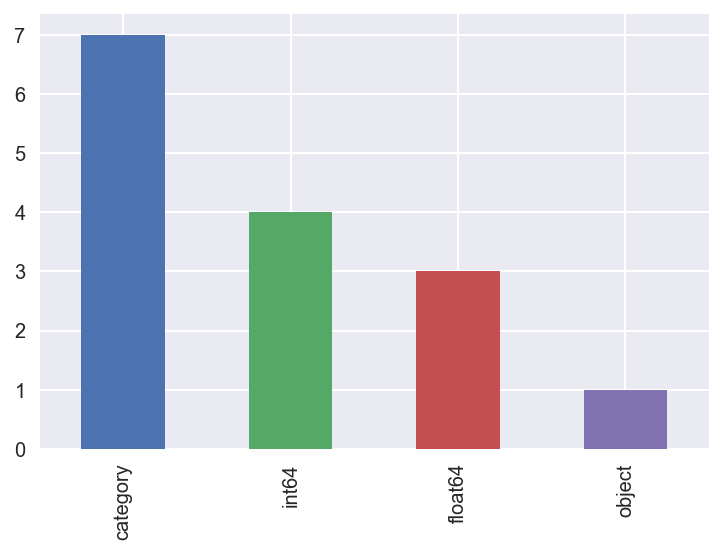

In [94]:
dataTypeDf.plot(kind='bar')

In [101]:
dataTypeDf.index

Index(['category', 'int64', 'float64', 'object'], dtype='object')

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


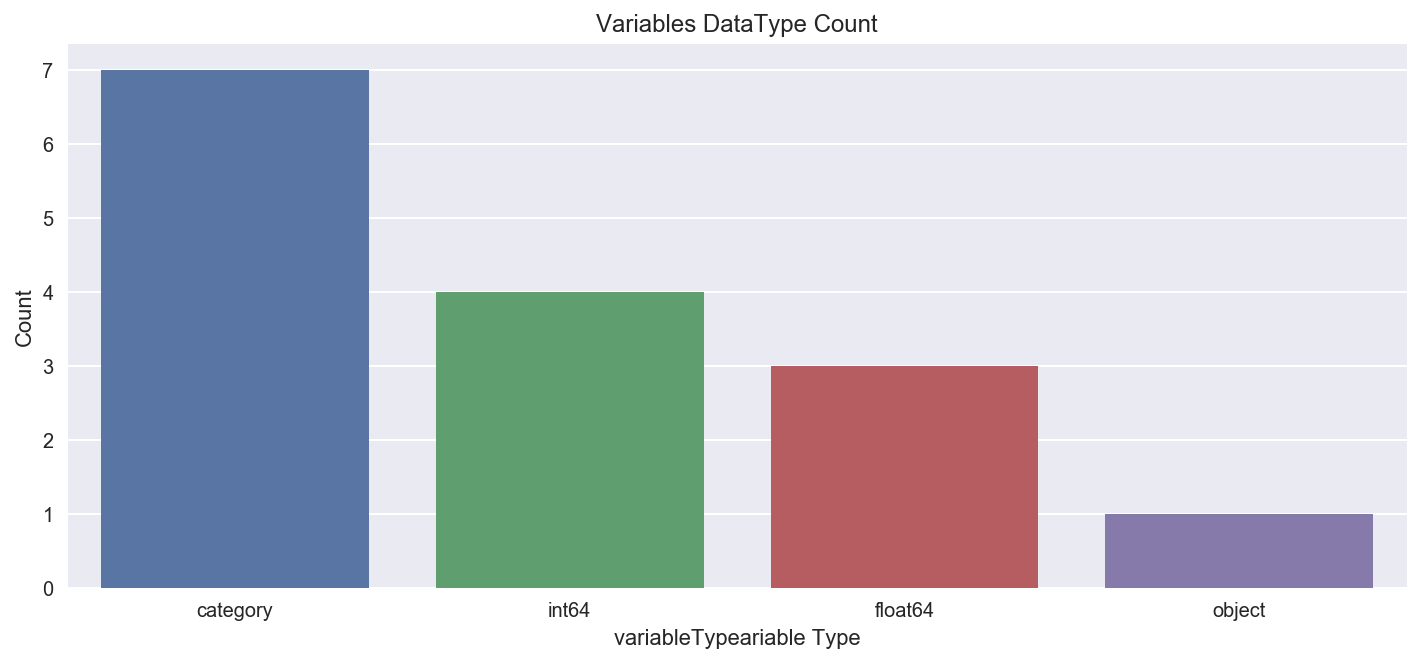

In [103]:
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
sns.barplot(dataTypeDf.index, dataTypeDf.values)
# 设置 x 轴标签，y 轴标签和 title
ax.set(xlabel='variableTypeariable Type',
       ylabel='Count', title="Variables DataType Count")
plt.show()

## missingno 一个分析缺失值的工具

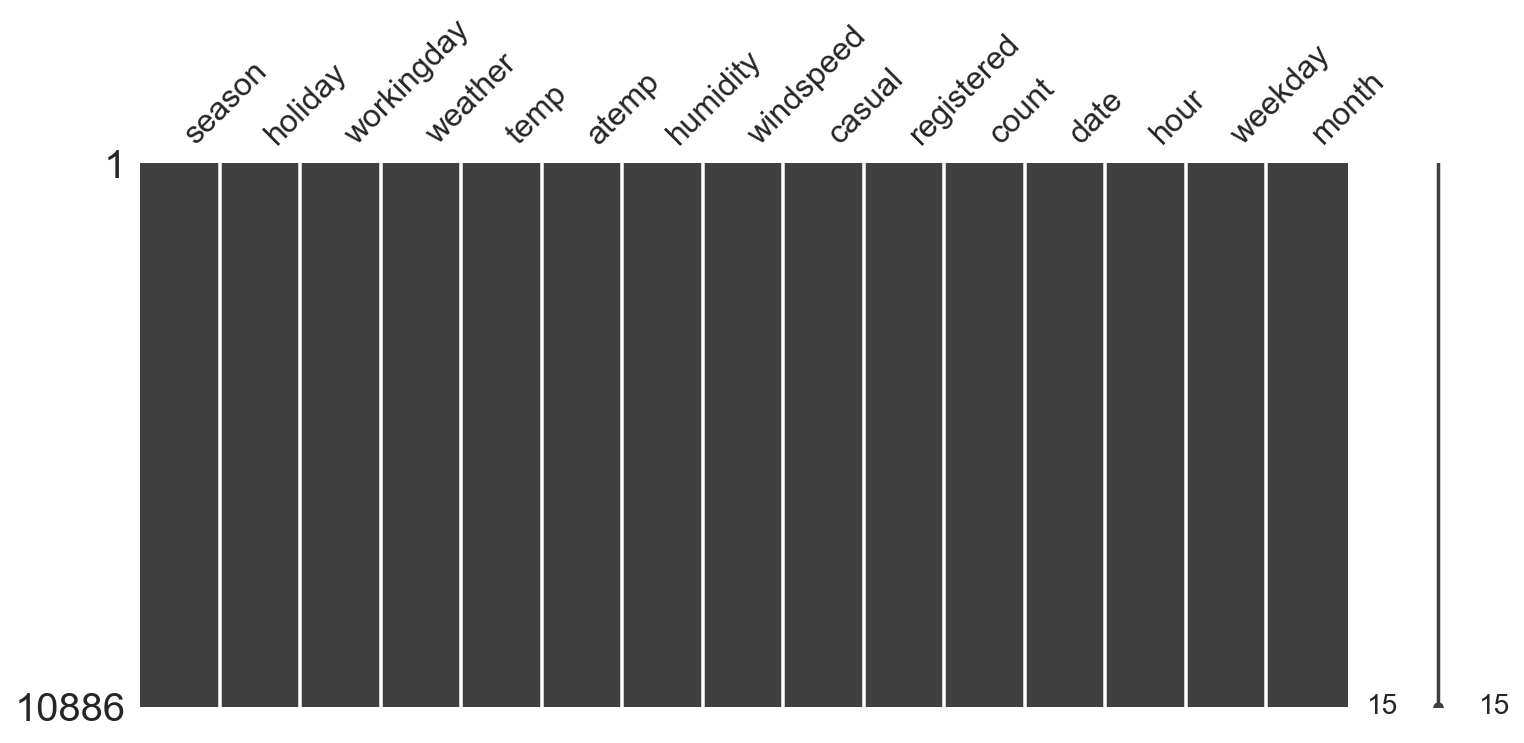

In [104]:
import missingno as msno

msno.matrix(dailyData,figsize=(12,5))

## 在一个 figure 里绘制多张图

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

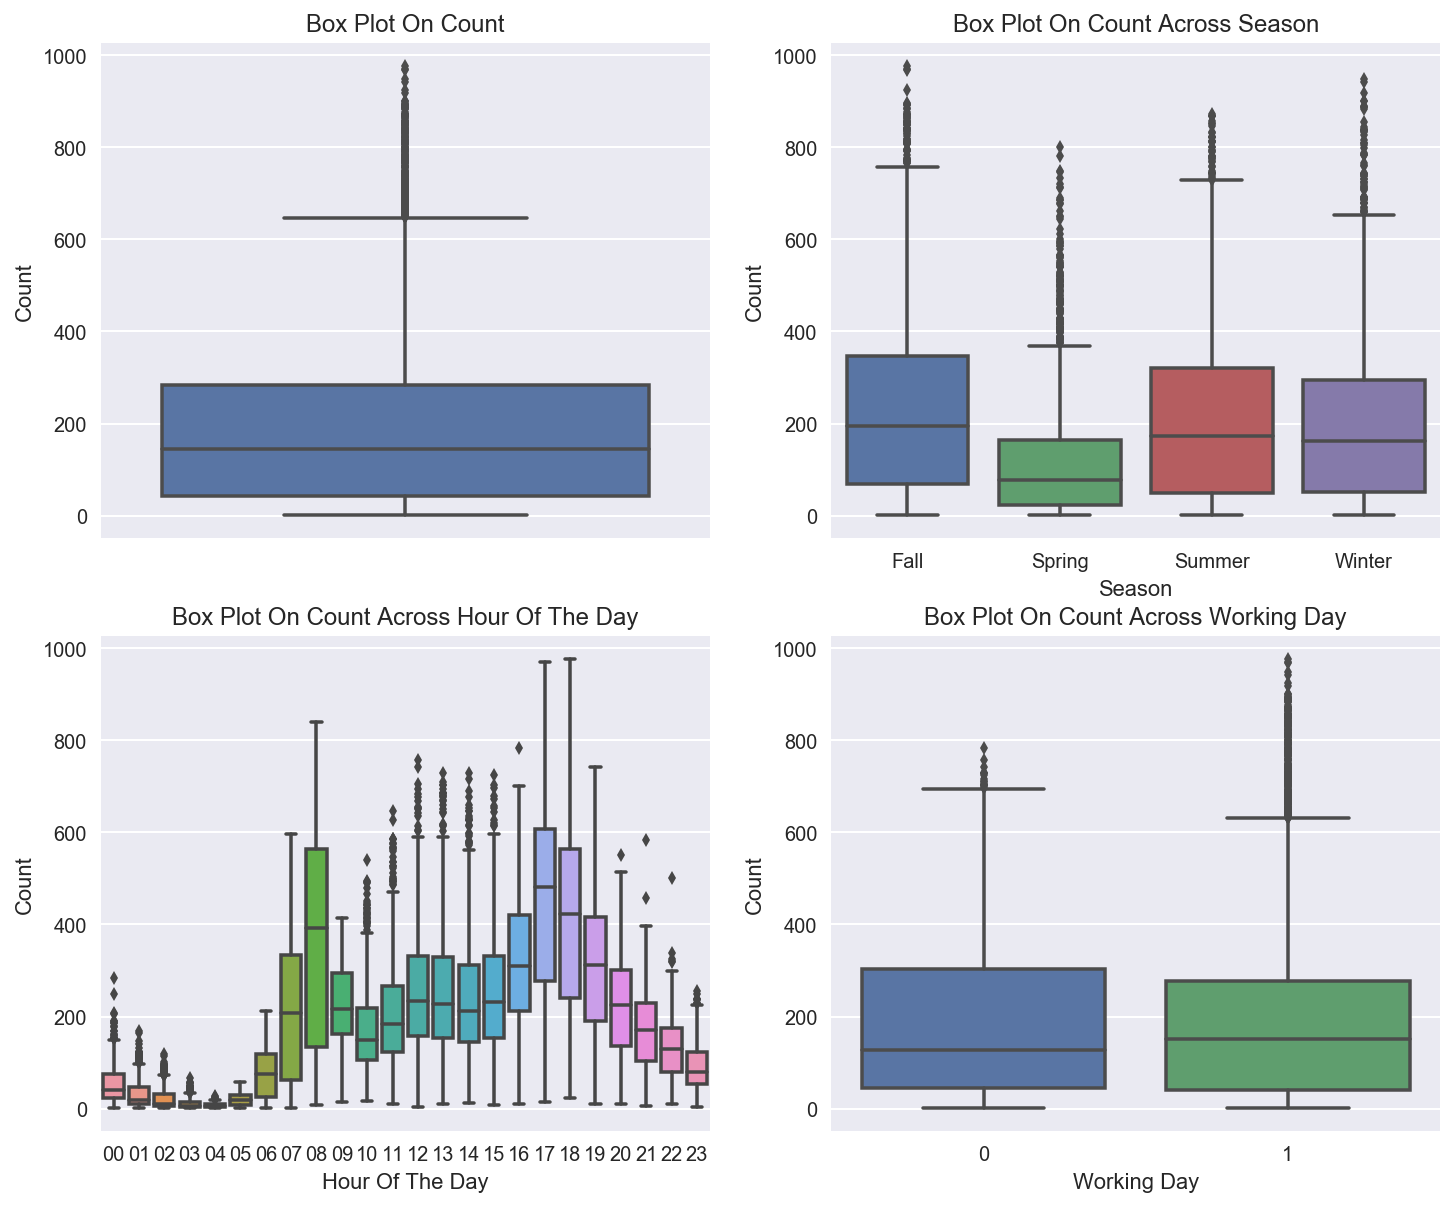

In [107]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)
# 只绘制目标变量的箱线图
sns.boxplot(y='count', data=dailyData, orient='v', ax=axes[0][0])

sns.boxplot(x='season', y='count', data=dailyData, ax=axes[0][1])
sns.boxplot(x='hour', y='count', data=dailyData, ax=axes[1][0])
sns.boxplot(x='workingday', y='count', data=dailyData, ax=axes[1][1])

# 统一设置标题、xlabel 和 ylabel

axes[0][0].set(ylabel='Count', title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',
               title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',
               title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',
               title="Box Plot On Count Across Working Day")


## 在 3 倍标准差以内的保留，其余删除

In [113]:
indexes = abs(dailyData["count"]-dailyData["count"].mean())<=3*dailyData["count"].std()

In [115]:
sum(indexes)

10739

In [117]:
dailyDataWithoutOutliers = dailyData[indexes]
dailyDataWithoutOutliers.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


## 相关性分析

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
date            object
hour          category
weekday       category
month         category
dtype: object

In [127]:
numerical_columns = dailyData.columns[dailyData.dtypes.map(lambda x:x=='float64' or x=='int64')]
numerical_columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

In [131]:
corrMatt = dailyData[numerical_columns].corr()
corrMatt

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


In [133]:
mask = np.array(corrMatt)
mask

array([[ 1.        ,  0.98494811, -0.06494877, -0.01785201,  0.46709706,
         0.31857128,  0.39445364],
       [ 0.98494811,  1.        , -0.04353571, -0.057473  ,  0.46206654,
         0.31463539,  0.38978444],
       [-0.06494877, -0.04353571,  1.        , -0.31860699, -0.3481869 ,
        -0.26545787, -0.31737148],
       [-0.01785201, -0.057473  , -0.31860699,  1.        ,  0.09227619,
         0.09105166,  0.10136947],
       [ 0.46709706,  0.46206654, -0.3481869 ,  0.09227619,  1.        ,
         0.49724969,  0.69041357],
       [ 0.31857128,  0.31463539, -0.26545787,  0.09105166,  0.49724969,
         1.        ,  0.97094811],
       [ 0.39445364,  0.38978444, -0.31737148,  0.10136947,  0.69041357,
         0.97094811,  1.        ]])

In [134]:
np.tril_indices_from(mask)

(array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6,
        6, 6, 6, 6, 6, 6]),
 array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0,
        1, 2, 3, 4, 5, 6]))